In [12]:
import math
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

random_seed = 30

In [2]:
data = pd.read_csv("../data/featured/data.csv", sep=';')

Xdata = data.drop('teamA_win', axis=1)
ydata = data.teamA_win

In [3]:
Xtrain, Xval, ytrain, yval = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed)

In [10]:
clf = KNeighborsClassifier()
clf.fit(Xtrain, ytrain)
print(f"Validation accuracy: {metrics.accuracy_score(yval, clf.predict(Xval)):0.4f}")

Validation accuracy: 0.5264


In [16]:
# Min-max scaler nafitujeme na trénovacích datech
scaler = MinMaxScaler()
Xtrain_scaled_mm = scaler.fit_transform(Xtrain)

# Následně stejnou transformaci aplikujeme i na validační data
Xval_scaled_mm = scaler.transform(Xval)

# Natrénujeme model na transformovaných datech
clf = KNeighborsClassifier()
clf.fit(Xtrain_scaled_mm, ytrain)

print(f"Validation accuracy of normalized model: {clf.score(Xval_scaled_mm, yval):0.4f}")

Validation accuracy of normalized model: 0.6199


In [17]:
# Min-max scaler nafitujeme na trénovacích datech
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Následně stejnou transformaci aplikujeme i na validační data
Xval_scaled = scaler.transform(Xval)

# Natrénujeme model na transformovaných datech
clf = KNeighborsClassifier()
clf.fit(Xtrain_scaled, ytrain)

print(f"Validation accuracy of normalized model: {clf.score(Xval_scaled, yval):0.4f}")

Validation accuracy of normalized model: 0.6350


In [18]:
val_acc = []
train_acc = []

kneighbors = range(3,15)
for k in kneighbors:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xtrain_scaled_mm, ytrain)
    val_acc.append(clf.score(Xval_scaled_mm, yval))
    train_acc.append(clf.score(Xtrain_scaled_mm, ytrain))

MinMax:
accuracy score (val): 0.651584


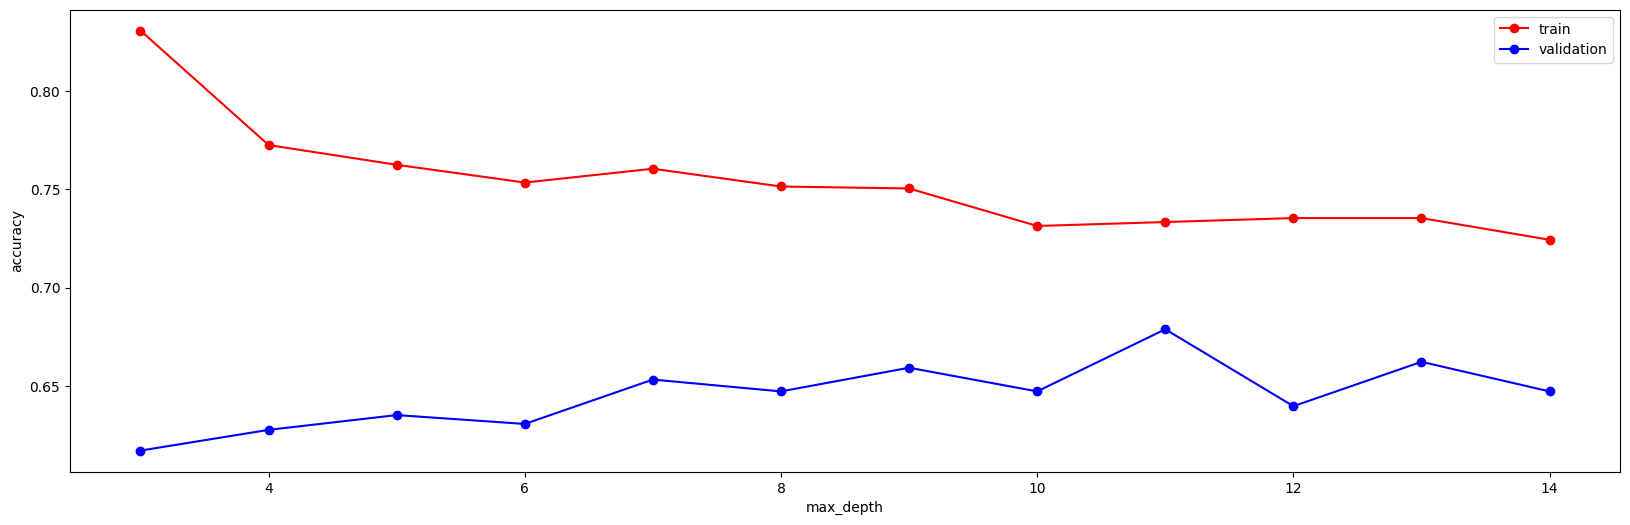

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("MinMax:")
plt.figure(figsize=(20,6))
plt.plot(kneighbors, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(kneighbors, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

knn = KNeighborsClassifier(n_neighbors = 11).fit(Xtrain_scaled_mm, ytrain)
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, knn.predict(Xval_scaled_mm))))

In [20]:
val_acc = []
train_acc = []

kneighbors = range(3,15)
for k in kneighbors:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xtrain_scaled, ytrain)
    val_acc.append(clf.score(Xval_scaled, yval))
    train_acc.append(clf.score(Xtrain_scaled, ytrain))

Standard:
accuracy score (val): 0.678733


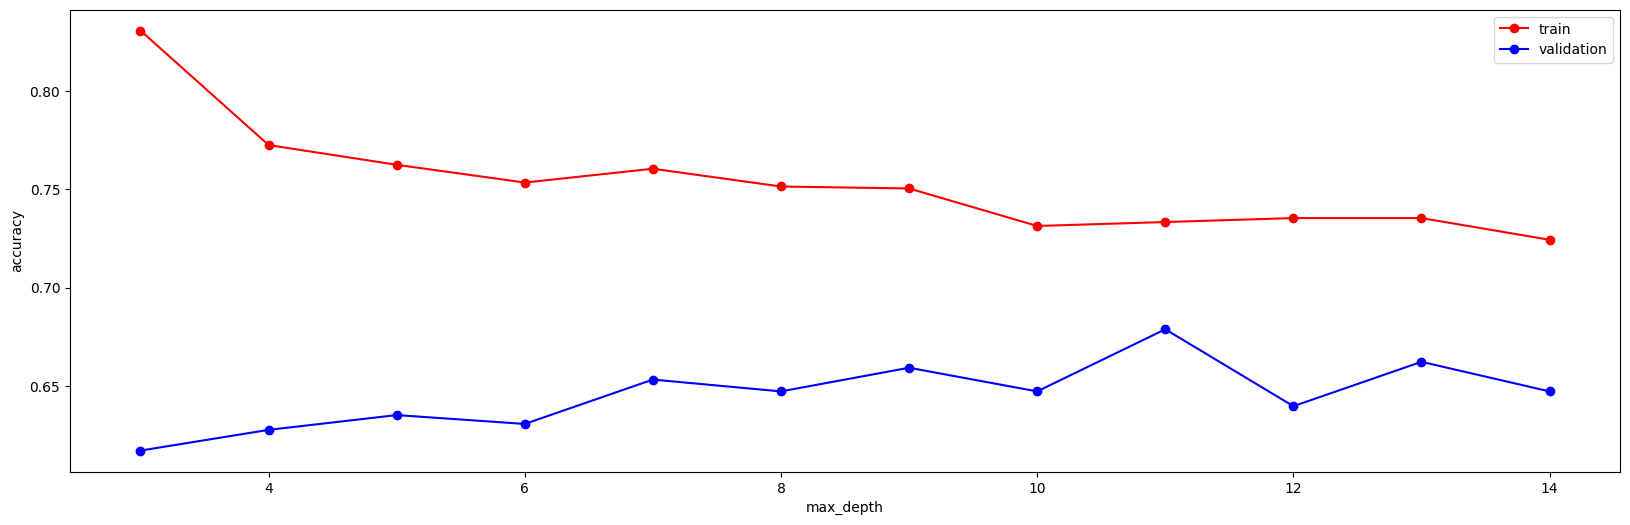

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("Standard:")
plt.figure(figsize=(20,6))
plt.plot(kneighbors, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(kneighbors, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

knn = KNeighborsClassifier(n_neighbors = 11).fit(Xtrain_scaled, ytrain)
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, knn.predict(Xval_scaled))))